# ML - ASSIGNMENT - 1

# Customer Churn Prediction 


## Group - 4

|S.No|Name|Roll Number|Contribution|
|--|-------------------------------|-------------------------------|-------------------------------|
 |1. | SUBHAJA KRISHNAN K U  | 2019ab04119|100%|
 |2. | P VIPLAVI  | 2019ah04063|100%|
 |3. | SANDEEP KUMAR JAKKARAJU | 2019ah04065|100%||

In [1]:
### Importing all the required python packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Reading the CSV file into a pandas data frame

df = pd.read_csv('Churn_Modelling.csv')

## print first 10 elements/records

df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.shape

(10000, 14)

In [5]:
## printing the descriptive statistics.

df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
## checking for null values in the dataframe

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
len(df[df.duplicated()])

0

In [8]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

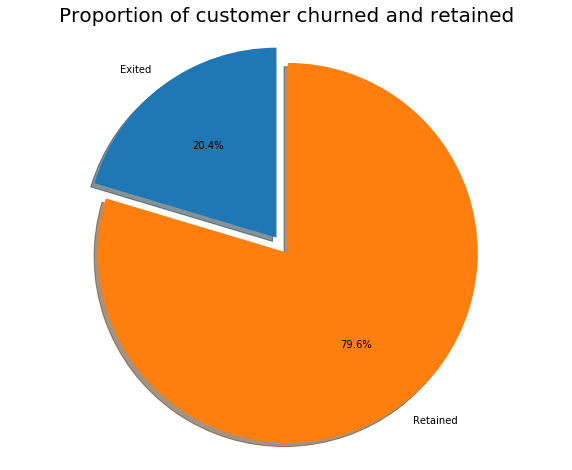

In [9]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

# We have an Imbalanced class problem

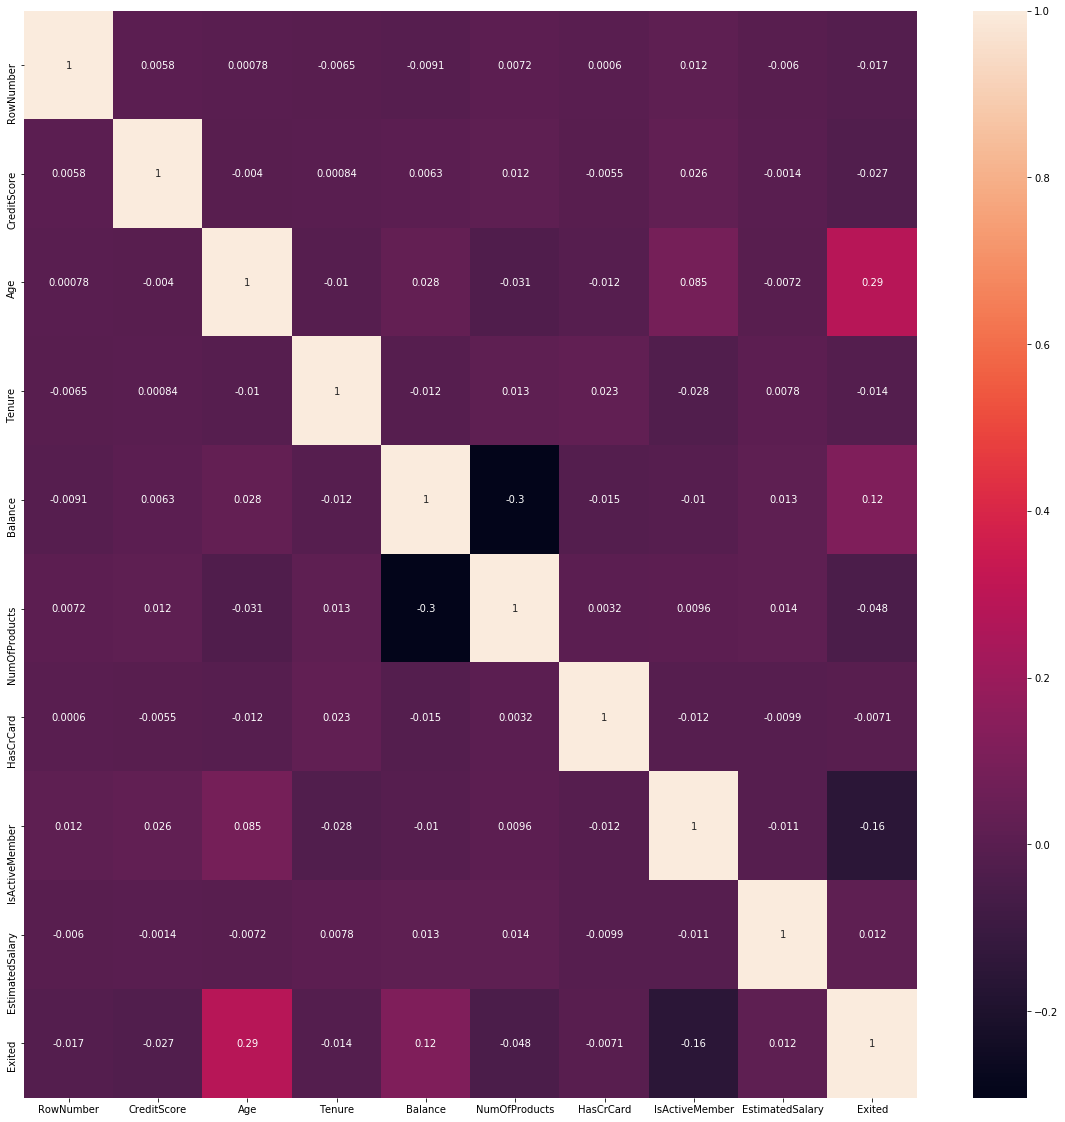

In [10]:
plt.figure(figsize=(20, 20))
corr = df.drop("CustomerId",axis=1).corr()
sns.heatmap(corr, annot=True)
plt.show()

### Age, Balance, isActiveMember seems to have correlation with Churn.

In [11]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
# printing class balance

df.groupby(['Exited'])['Exited'].count()

Exited
0    7963
1    2037
Name: Exited, dtype: int64

In [14]:

percent100 = df['Exited'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(percent100)

0    79.6%
1    20.4%
Name: Exited, dtype: object


### Here we have a classic imbalanced class 80 : 20, We need to do k-fold classification

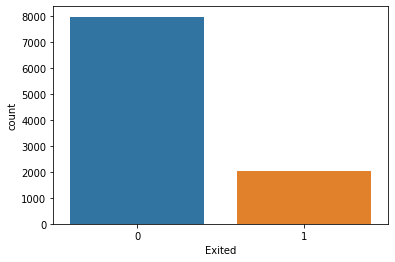

In [15]:
#Visualize the count of customer churn
sns.countplot(df['Exited'])

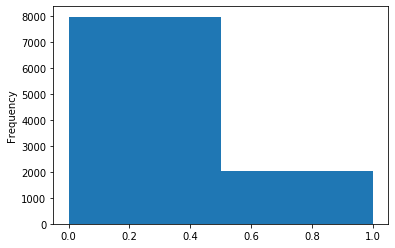

In [16]:
df['Exited'].plot.hist(bins=2)

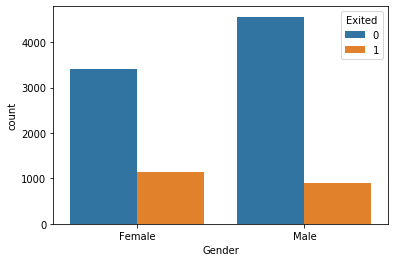

In [17]:
#Visualize the churn count for both Males and Females
sns.countplot(x='Gender', hue='Exited',data = df)

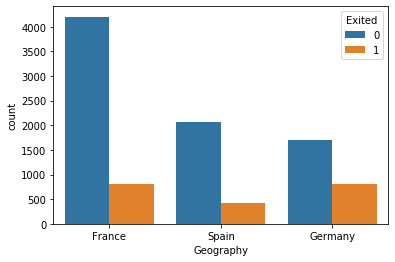

In [18]:
#Visualize the churn count for both Males and Females
sns.countplot(x='Geography', hue='Exited',data = df)

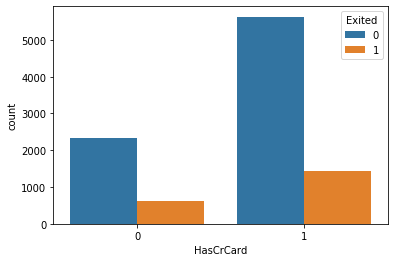

In [19]:
sns.countplot(x='HasCrCard', hue = 'Exited',data = df)

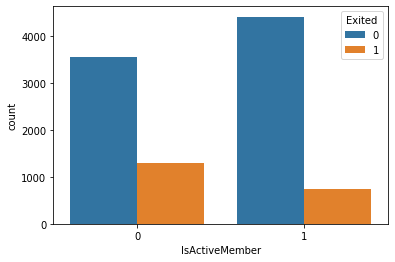

In [20]:
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df)

In [21]:
### LABEL encoding the categorical columns

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Geography']= label_encoder.fit_transform(df['Geography'])
df['Gender']= label_encoder.fit_transform(df['Gender'])


In [22]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [23]:
df["Geography"].head(5)

0    0
1    2
2    0
3    0
4    2
Name: Geography, dtype: int32

In [24]:
df.groupby(['Geography'])['Geography'].count()

Geography
0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [25]:
df['Gender'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int32

In [26]:
df.groupby(['Gender'])['Gender'].count()

Gender
0    4543
1    5457
Name: Gender, dtype: int64

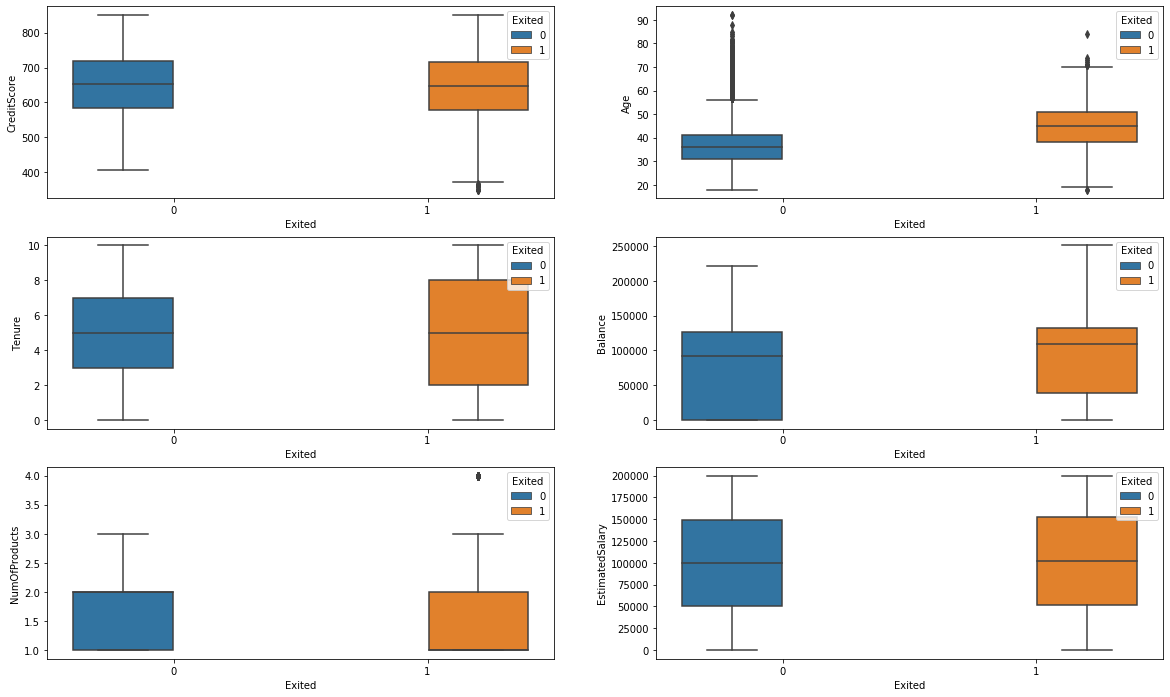

In [27]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

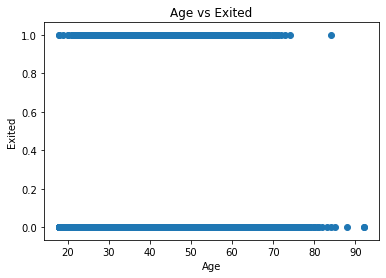

In [28]:
# Hypothetical equity returns
xData = df['Age'].values
yData = df['Exited'].values

# Draw the scatter plot
plt.scatter(xData, yData)
plt.title('Age vs Exited')
plt.xlabel('Age')
plt.ylabel('Exited')
plt.show()

In [29]:
## printing the descriptive statistics.

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Geography,10000.0,7.463000e-01,0.827529,0.00,0.00,0.000000e+00,1.000000e+00,2.00
Gender,10000.0,5.457000e-01,0.497932,0.00,0.00,1.000000e+00,1.000000e+00,1.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00


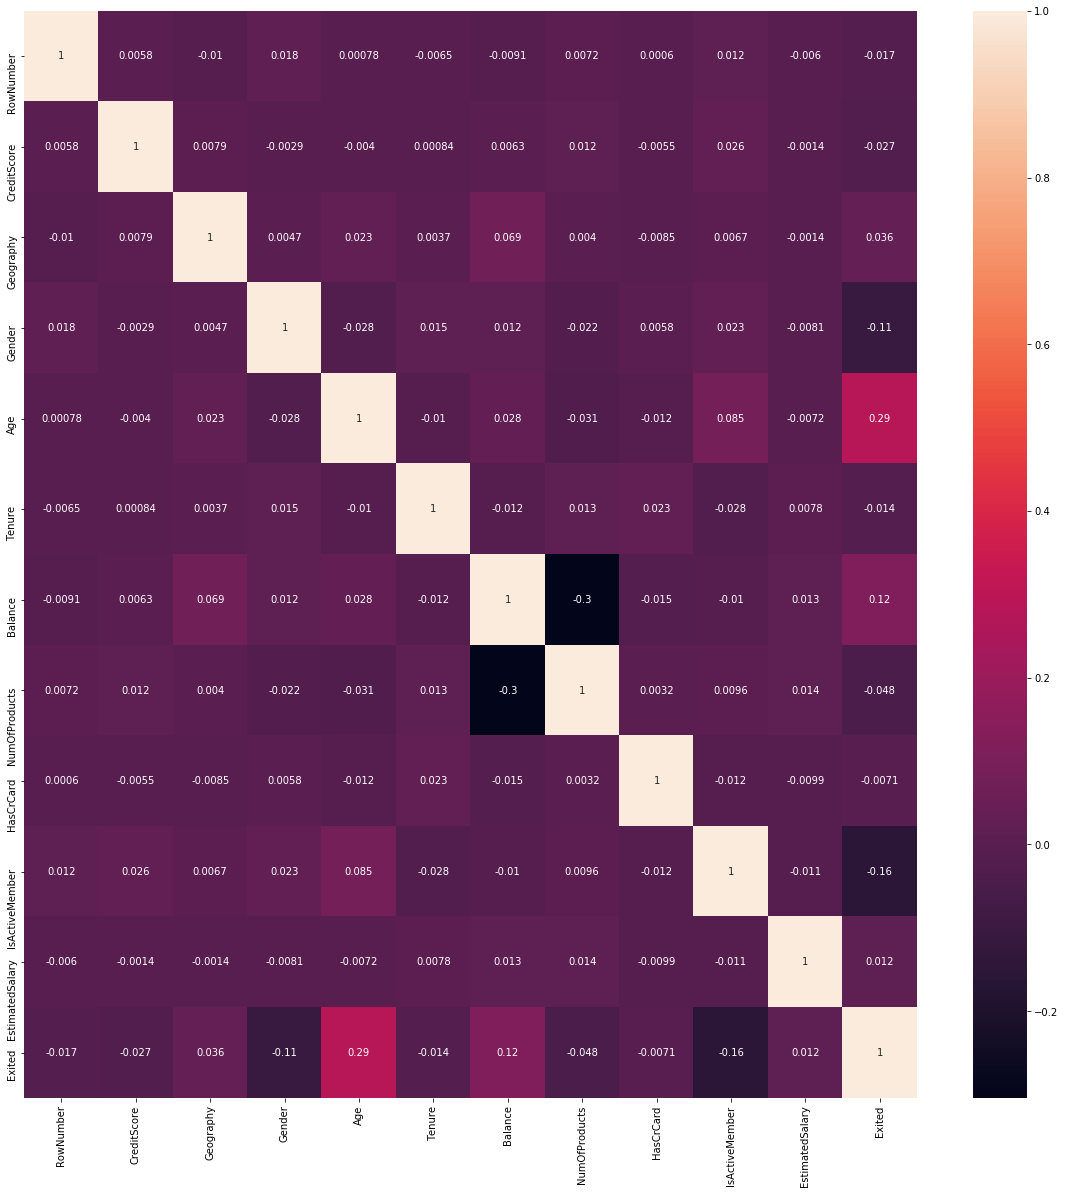

In [30]:
plt.figure(figsize=(20, 20))
corr = df.drop("CustomerId",axis=1).corr()
sns.heatmap(corr, annot=True)
plt.show()

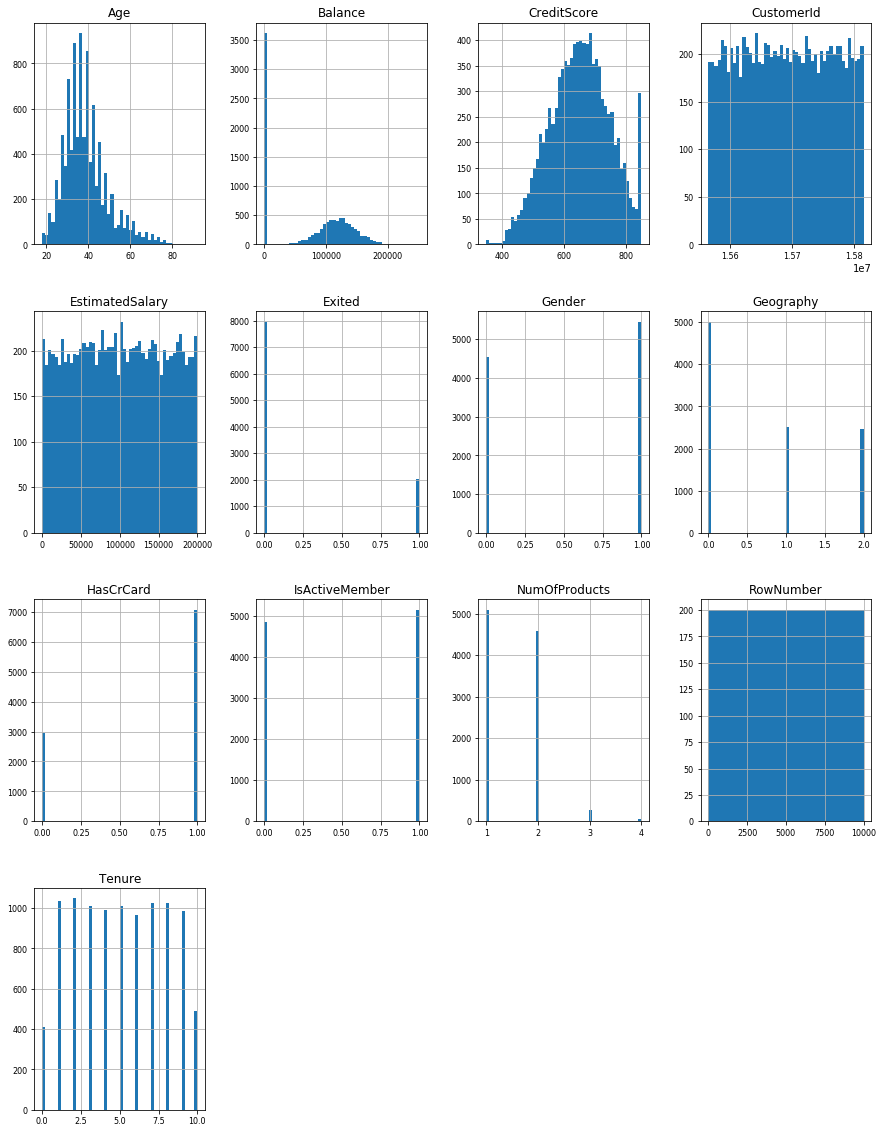

In [31]:

# Plot the distribution for each variable
df.hist(figsize=(15,20),bins = 50,xlabelsize=8,ylabelsize =8)
plt.show()

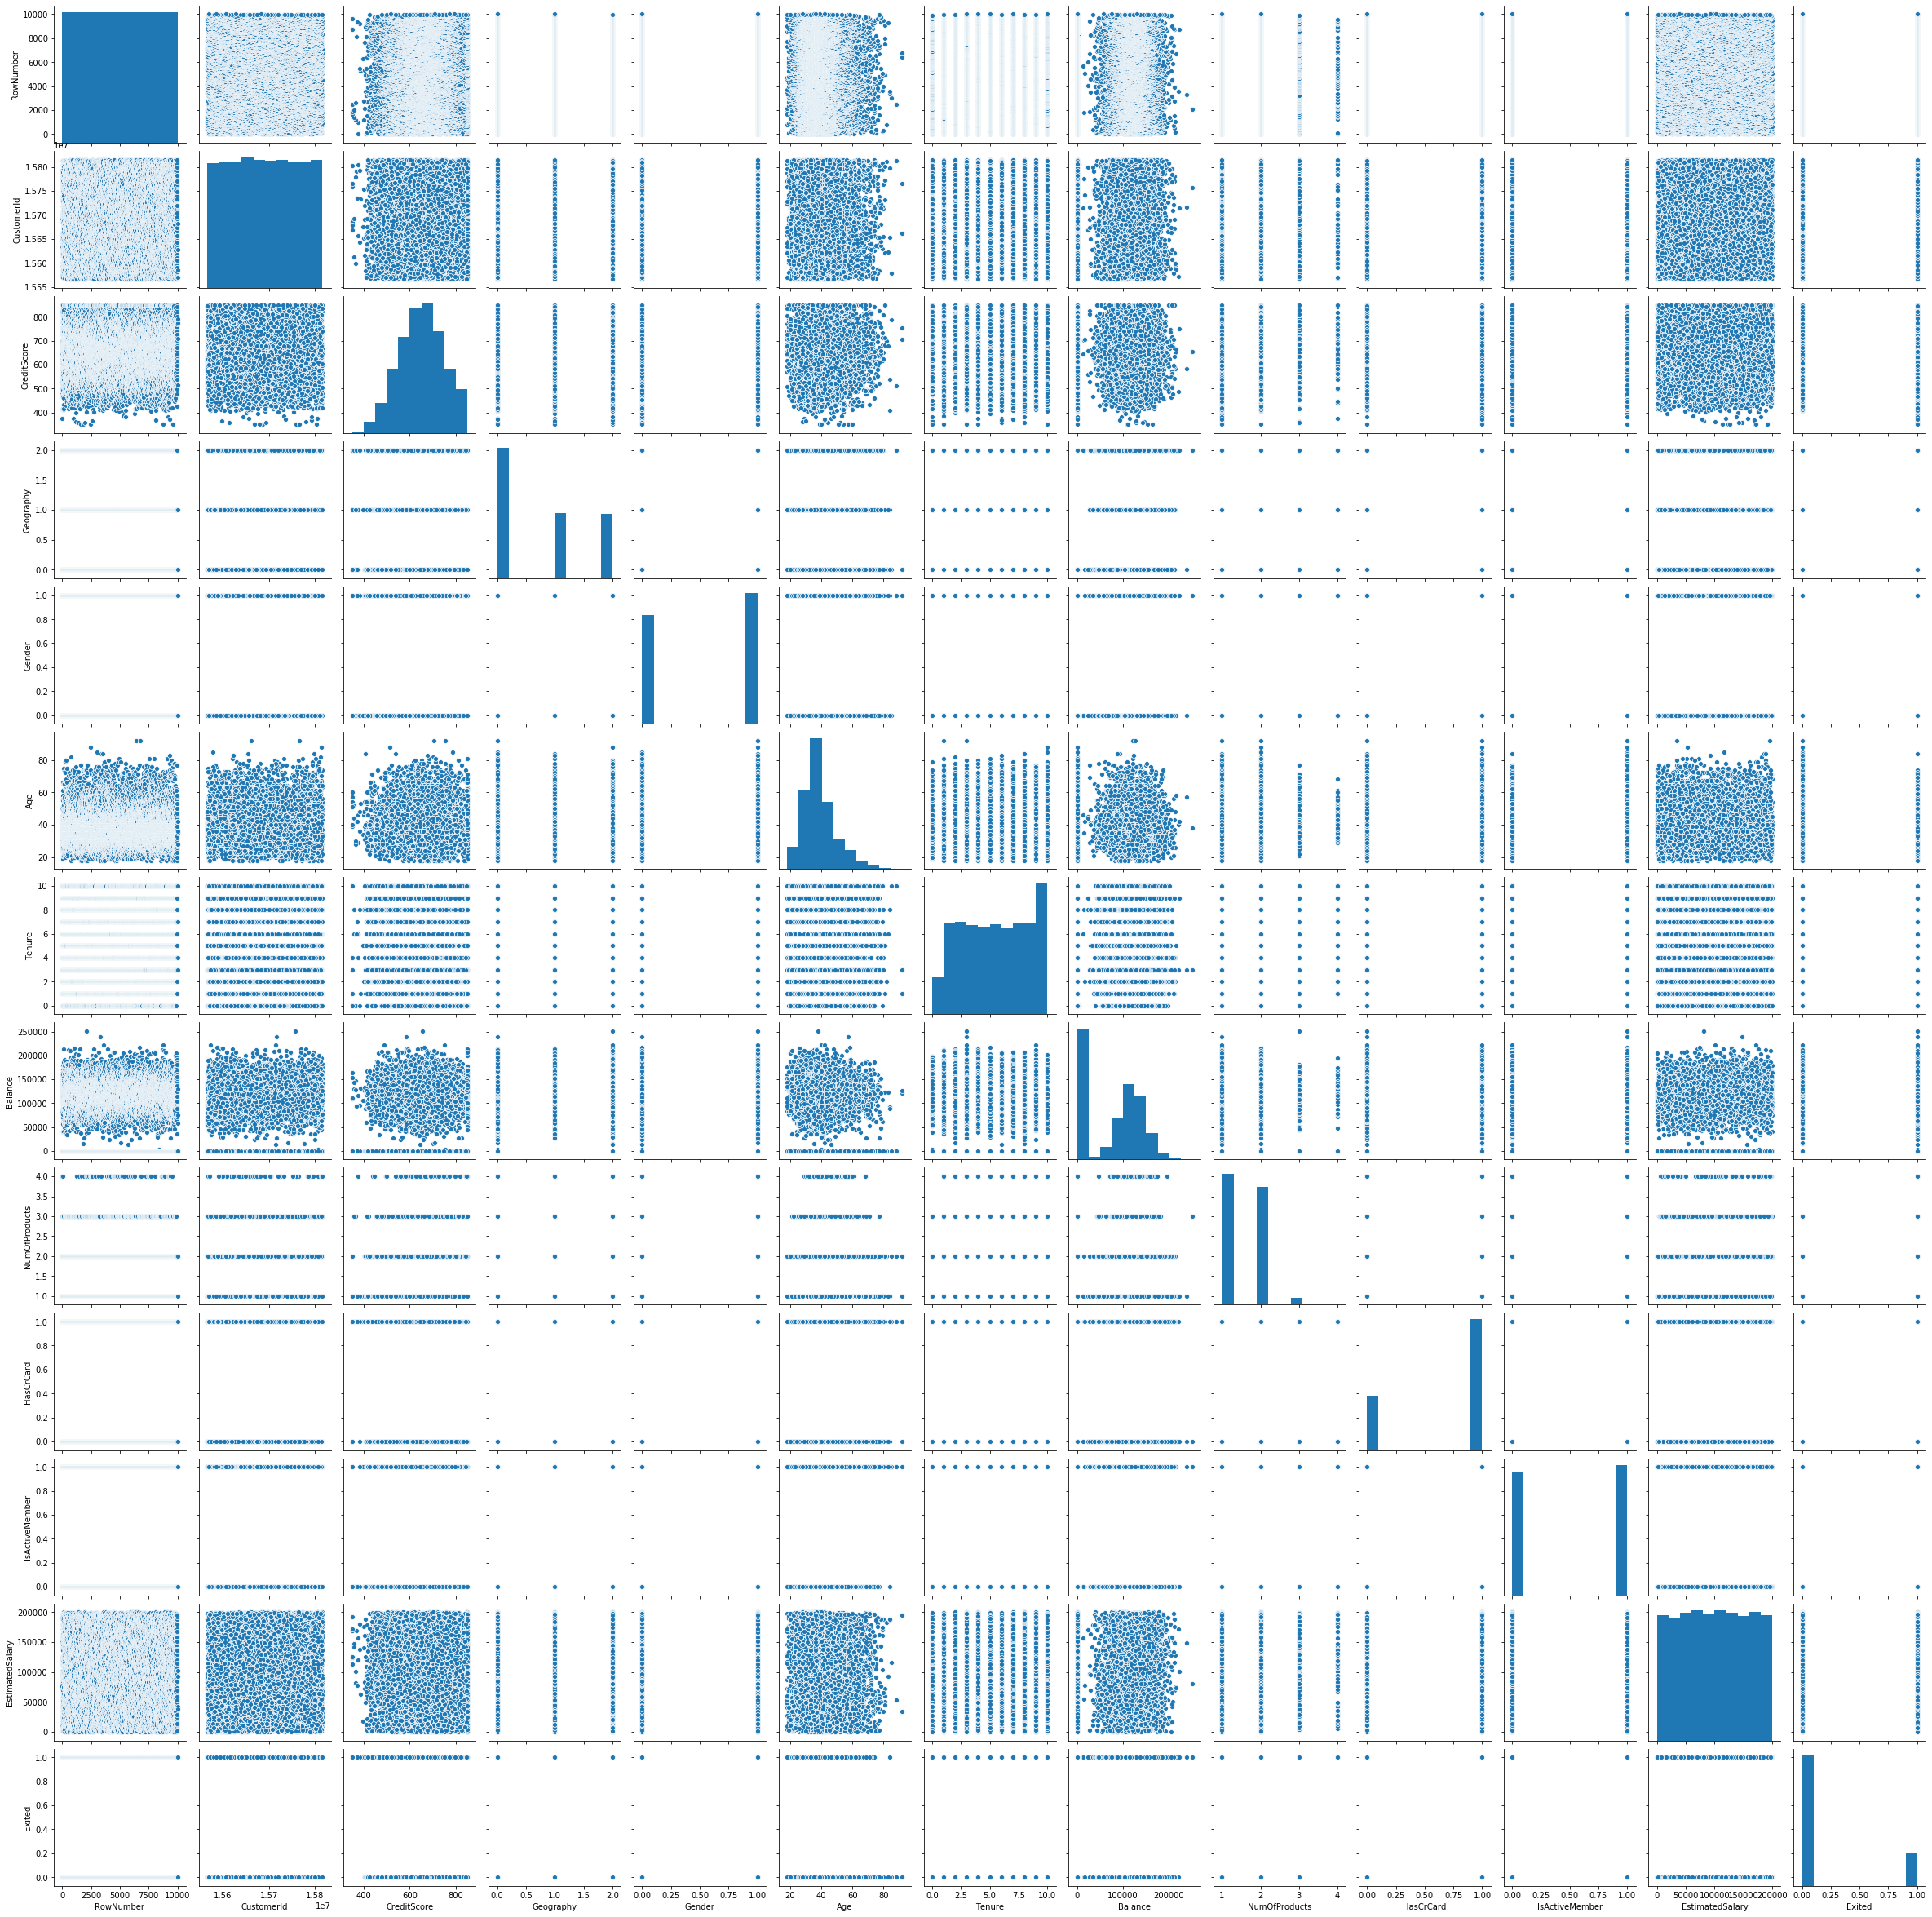

In [32]:
sns.pairplot(df)

In [33]:
df.corr()["Exited"]

RowNumber         -0.016571
CustomerId        -0.006248
CreditScore       -0.027094
Geography          0.035943
Gender            -0.106512
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
Name: Exited, dtype: float64

In [34]:
# Percentile based outlier detection
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    return ((data < minval) | (data > maxval))

In [35]:
# Removing RowNumber, CustomerId, Surname column as it is redundant information

features = ['CreditScore', 'Age','Balance','NumOfProducts','HasCrCard', 'IsActiveMember','EstimatedSalary', 'Geography','Gender']
len(features)

9

In [36]:
X = df[features]
y = df['Exited']

In [37]:
# Percentile based outlier detection
percentile_based_outlier(X)

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography,Gender
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False


In [38]:
import collections
collections.Counter(X.Age)

Counter({42: 321,
         41: 366,
         39: 423,
         43: 297,
         44: 257,
         50: 134,
         29: 348,
         27: 209,
         31: 404,
         24: 132,
         34: 447,
         25: 154,
         35: 474,
         45: 229,
         58: 67,
         32: 418,
         38: 477,
         46: 226,
         36: 456,
         33: 442,
         40: 432,
         51: 119,
         61: 53,
         49: 147,
         37: 478,
         19: 27,
         66: 35,
         56: 70,
         26: 200,
         21: 53,
         55: 82,
         75: 9,
         22: 84,
         30: 327,
         28: 273,
         65: 18,
         48: 168,
         52: 102,
         57: 75,
         73: 13,
         47: 175,
         54: 84,
         72: 21,
         20: 40,
         67: 37,
         79: 4,
         62: 52,
         53: 74,
         80: 3,
         59: 62,
         68: 19,
         23: 99,
         60: 62,
         70: 18,
         63: 40,
         64: 37,
         18: 22,
     

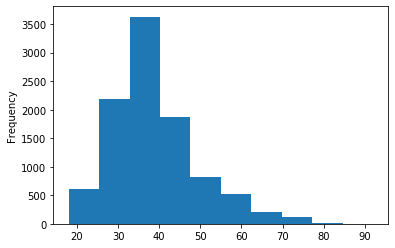

In [39]:
X['Age'].plot.hist(bins=10)

# Removing Outliers in Age

In [40]:

## Changing all ages above 60 to median 

med = X.Age.median()
for val in range(len(X.Age)):
    if (X.Age[val] > 60):
        X.Age[val] = med

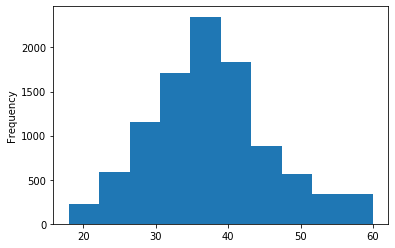

In [41]:
X['Age'].plot.hist(bins=10)

In [42]:
X.Age

0       42
1       41
2       42
3       39
4       43
        ..
9995    39
9996    35
9997    36
9998    42
9999    28
Name: Age, Length: 10000, dtype: int64

In [43]:
X.shape

(10000, 9)

In [44]:
y.shape

(10000,)

In [45]:
# Splitting the dataset into Test-Train Sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [46]:

def printStats(arr):
    unique, frequency = np.unique(arr,return_counts = True) 
    print('[0] ='+str(((frequency[0]/len(arr))*100))+" % -- [1] ="+str(((frequency[1]/len(arr))*100))+' %')


In [47]:
## print sample stats for traing data
printStats(y_train)

[0] =79.62666666666667 % -- [1] =20.37333333333333 %


In [48]:
## print sample stats for traing data
printStats(y_test)

[0] =79.64 % -- [1] =20.36 %


In [49]:
# Normalizing all the features.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
model = LogisticRegression()

In [51]:
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
y_pred = model.predict(X_test)

In [53]:
accuracy_score(y_test, y_pred)

0.8252

In [54]:
pd.crosstab(y_test, y_pred, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
True,,,
0,1927,64,1991
1,373,136,509
All,2300,200,2500


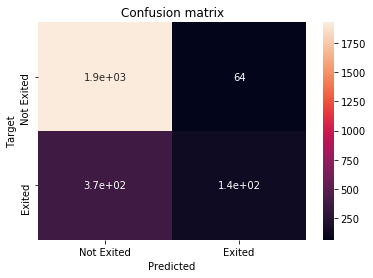

In [55]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=['Not Exited','Exited'], 
            yticklabels=['Not Exited','Exited'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion matrix')
plt.show()

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1991
           1       0.68      0.27      0.38       509

    accuracy                           0.83      2500
   macro avg       0.76      0.62      0.64      2500
weighted avg       0.81      0.83      0.79      2500



In [57]:
X = X.values
y = y.values

In [58]:
from sklearn.model_selection import KFold # import KFold

kf = KFold(n_splits=20) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

20

In [59]:
from sklearn.ensemble import BaggingClassifier
best=0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("Train Stats")
    printStats(y_train)
    
    print("Test Stats")
    printStats(y_test)
    
    bg = BaggingClassifier(model,max_samples=0.5,n_estimators=10)
    bg.fit(X_train,y_train)
    y_pred = bg.predict(X_test)
    if(best < accuracy_score(y_test, y_pred)):
        best = accuracy_score(y_test, y_pred)
        best_model = bg
    print('Accuracy ='+str(accuracy_score(y_test, y_pred)))

Train Stats
[0] =79.63157894736842 % -- [1] =20.36842105263158 %
Test Stats
[0] =79.60000000000001 % -- [1] =20.4 %
Accuracy =0.798
Train Stats
[0] =79.63157894736842 % -- [1] =20.36842105263158 %
Test Stats
[0] =79.60000000000001 % -- [1] =20.4 %
Accuracy =0.798
Train Stats
[0] =79.80000000000001 % -- [1] =20.200000000000003 %
Test Stats
[0] =76.4 % -- [1] =23.599999999999998 %
Accuracy =0.76
Train Stats
[0] =79.54736842105264 % -- [1] =20.45263157894737 %
Test Stats
[0] =81.2 % -- [1] =18.8 %
Accuracy =0.824
Train Stats
[0] =79.7578947368421 % -- [1] =20.242105263157896 %
Test Stats
[0] =77.2 % -- [1] =22.8 %
Accuracy =0.776
Train Stats
[0] =79.63157894736842 % -- [1] =20.36842105263158 %
Test Stats
[0] =79.60000000000001 % -- [1] =20.4 %
Accuracy =0.81
Train Stats
[0] =79.67368421052632 % -- [1] =20.326315789473686 %
Test Stats
[0] =78.8 % -- [1] =21.2 %
Accuracy =0.798
Train Stats
[0] =79.69473684210526 % -- [1] =20.305263157894736 %
Test Stats
[0] =78.4 % -- [1] =21.6 %
Accuracy =

In [60]:
best_model

BaggingClassifier(base_estimator=LogisticRegression(), max_samples=0.5)

In [61]:
## Best Accuracy
print("Accracy ="+str(best))

Accracy =0.83


In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       413
           1       0.57      0.09      0.16        87

    accuracy                           0.83       500
   macro avg       0.70      0.54      0.53       500
weighted avg       0.79      0.83      0.78       500



In [63]:
# Splitting the dataset into Test-Train Sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [64]:
## print sample stats for traing data
printStats(y_train)

[0] =79.62666666666667 % -- [1] =20.37333333333333 %


In [65]:
## print sample stats for traing data
printStats(y_train)

[0] =79.62666666666667 % -- [1] =20.37333333333333 %


In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8536

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1991
           1       0.70      0.49      0.58       509

    accuracy                           0.85      2500
   macro avg       0.79      0.72      0.74      2500
weighted avg       0.84      0.85      0.84      2500



In [68]:
# Splitting the dataset into Test-Train Sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [69]:
## print sample stats for traing data
printStats(y_train)

[0] =79.62666666666667 % -- [1] =20.37333333333333 %


In [70]:
## print sample stats for traing data
printStats(y_train)

[0] =79.62666666666667 % -- [1] =20.37333333333333 %


In [71]:
from xgboost import  XGBClassifier
clf5 = XGBClassifier(random_state=10)
clf5.fit(X_train, y_train)
y_pred = clf5.predict(X_test)
accuracy_score(y_test, y_pred)

0.8576

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1991
           1       0.73      0.47      0.57       509

    accuracy                           0.86      2500
   macro avg       0.81      0.71      0.74      2500
weighted avg       0.85      0.86      0.85      2500



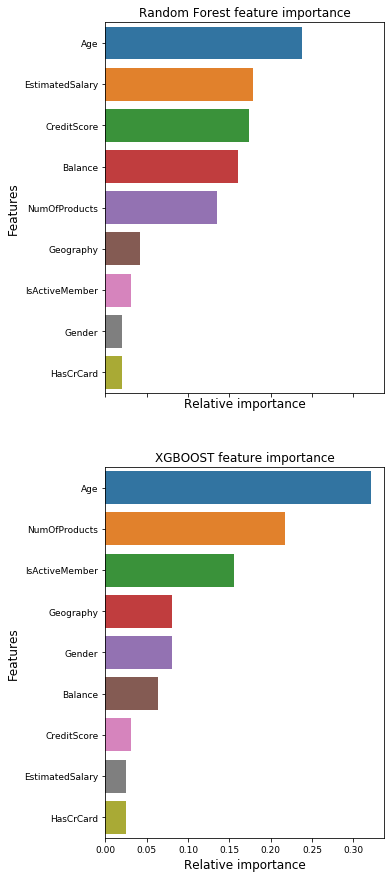

In [73]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(5,15))

names_classifiers = [("Random Forest", rf),("XGBOOST",clf5)]

nclassifier = 0
for row in range(nrows):
    name = names_classifiers[nclassifier][0]
    classifier = names_classifiers[nclassifier][1]
    indices = np.argsort(classifier.feature_importances_)[::-1][:40]
    ddf = df[features]
    g = sns.barplot(y=ddf.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row])
    g.set_xlabel("Relative importance",fontsize=12)
    g.set_ylabel("Features",fontsize=12)
    g.tick_params(labelsize=9)
    g.set_title(name + " feature importance")
    nclassifier += 1


## As expected Age, isActiveMember, Balance seems to be important features

# Since we have an imbalanced class dataset we should using some sampling technique to create a balanced dataset. Below we use SMOTE.

In [74]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
# Splitting the dataset into Test-Train Sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("Training Stats")
printStats(y_train)

print("Testing Stats")
printStats(y_test)

X_train_new, y_train_new = sm.fit_sample(X_train, y_train)
X_test_new, y_test_new = X_test, y_test

Training Stats
[0] =79.62666666666667 % -- [1] =20.37333333333333 %
Testing Stats
[0] =79.64 % -- [1] =20.36 %


In [75]:
print("SMOTE Training Stats")
printStats(y_train_new)

print("SMOTE Testing Stats")
printStats(y_test_new)

SMOTE Training Stats
[0] =50.0 % -- [1] =50.0 %
SMOTE Testing Stats
[0] =79.64 % -- [1] =20.36 %


# Logistic Regression after SMOTE

In [76]:
model = LogisticRegression()
model.fit(X_train_new, y_train_new)
y_pred_new = model.predict(X_test_new)
accuracy_score(y_test_new, y_pred_new)

0.6428

In [77]:
print(classification_report(y_test_new,y_pred_new))

              precision    recall  f1-score   support

           0       0.89      0.63      0.74      1991
           1       0.32      0.70      0.44       509

    accuracy                           0.64      2500
   macro avg       0.61      0.66      0.59      2500
weighted avg       0.77      0.64      0.68      2500



# Random Forest after SMOTE

In [78]:
model = RandomForestClassifier(random_state=10)
model.fit(X_train_new, y_train_new)
y_pred_new = model.predict(X_test_new)
accuracy_score(y_test_new, y_pred_new)

0.8564

In [79]:
print(classification_report(y_test_new,y_pred_new))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1991
           1       0.69      0.54      0.60       509

    accuracy                           0.86      2500
   macro avg       0.79      0.74      0.76      2500
weighted avg       0.85      0.86      0.85      2500



# XGBOOST after SMOTE

In [80]:
model = XGBClassifier(random_state=10)
model.fit(X_train_new, y_train_new)
y_pred_new = model.predict(X_test_new)
accuracy_score(y_test_new, y_pred_new)

0.8492

In [81]:
print(classification_report(y_test_new,y_pred_new))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1991
           1       0.66      0.54      0.59       509

    accuracy                           0.85      2500
   macro avg       0.77      0.73      0.75      2500
weighted avg       0.84      0.85      0.84      2500



# The End